In [27]:
import fastf1
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting as f1_plt
import pandas as pd
import utils as ut

In [28]:
# gettting the data
session = ut.get_session()

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.0.0]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['20', '1', '63', '4', '55', '31', '14', '44', '11', '16', '23', '10', '5', '3', '18', '6', '24', '77', '22', '47']


In [29]:
q1, q2, q3 = ut.get_qualifying(session)
fast_mag = q3.pick_driver('MAG')
fast_ver = q3.pick_driver('VER')

In [30]:
best_lap_mag = fast_mag.pick_lap(25).get_car_data()
best_lap_tel_mag = fast_mag.pick_lap(25).get_telemetry()

best_lap_ver = fast_ver.pick_lap(22).get_car_data()
best_lap_tel_ver = fast_ver.pick_lap(22).get_telemetry()

In [31]:
x_mag = best_lap_tel_mag["X"]
y_mag = best_lap_tel_mag["Y"]
x_ver = best_lap_tel_ver["X"]
y_ver = best_lap_tel_ver["Y"]

In [32]:
from datetime import timedelta, datetime

gaps = []
time = datetime.strptime("16:00:00.000", "%H:%M:%S.%f")

for i in range(len(best_lap_tel_mag)):
    time1 = time + best_lap_tel_mag["Time"][best_lap_tel_mag.index[i]]
    time2 = time + best_lap_tel_ver["Time"][best_lap_tel_mag.index[i]]

    gap = time1 - time2

    gaps.append(gap.total_seconds())

In [33]:
idx, first_fastest = ut.compare_minisectors(best_lap_tel_mag, best_lap_tel_ver, turn_difference=800)

In [34]:
from datetime import datetime


gaps = []
time = datetime.strptime("16:00:00.000", "%H:%M:%S.%f")

for i in range(len(best_lap_tel_mag)):
    time1 = time + best_lap_tel_mag["Time"][best_lap_tel_mag.index[i]]
    time2 = time + best_lap_tel_ver["Time"][best_lap_tel_mag.index[i]]

    gap = time1 - time2
    # gap_sec = gap.strftime("%H:%M:%S")

    gaps.append(gap.total_seconds())

In [35]:
len(gaps)

540

In [36]:
magColor = fastf1.plotting.driver_color("mag")
verColor = fastf1.plotting.driver_color("ver")

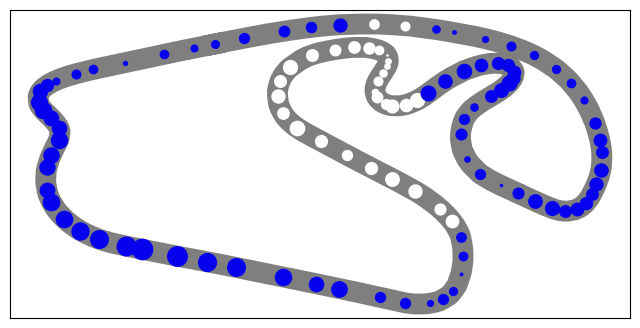

In [37]:

img = plt.imread("figures/Brazil_circuit.png")
fig, ax = plt.subplots(figsize=(8, 4))
# ax.imshow(img, extent=[-6250, 6850, -2400, 5150]) # for brazil_circuit
ax.set_facecolor("white")
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax.plot(y_mag, -x_mag, label='MAG', c="black", linewidth=15, alpha=0.5, zorder = 0)

draw = 0

for i in range(0, len(x_mag.index)):
    index = x_mag.index[i]
    draw += 1
    if index in idx[:]:
        color = magColor if first_fastest[idx.index(index) - 1] else verColor
    if draw % 5 == 0:
        ax.scatter(y_mag[index], -x_mag[index], c=color, s=abs(gaps[i]) * 150)
         # for brazil_circuit
        # ax.scatter(y_mag[index], -x_mag[index], c=color, s=abs(gaps[i]) * 50)
    

plt.show()

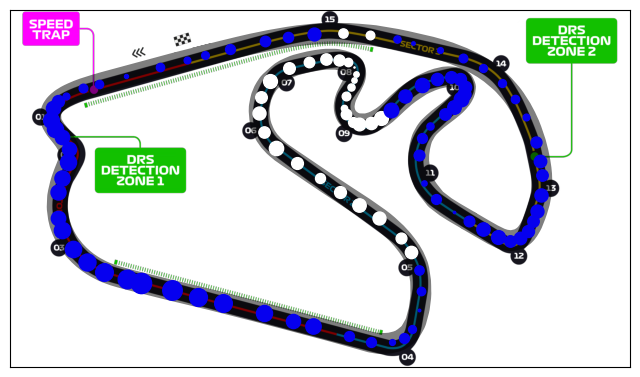

In [38]:
img = plt.imread("figures/Brazil_circuit.png")
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img, extent=[-6250, 6850, -2400, 5150]) # for brazil_circuit
ax.set_facecolor("white")
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax.plot(y_mag, -x_mag, label='MAG', c="black", linewidth=15, alpha=0.5, zorder = 0)

draw = 0

for i in range(0, len(x_mag.index)):
    index = x_mag.index[i]
    draw += 1
    if index in idx[:]:
        color = magColor if first_fastest[idx.index(index) - 1] else verColor
    if draw % 5 == 0:
        ax.scatter(y_mag[index], -x_mag[index], c=color, s=abs(gaps[i]) * 150)
         # for brazil_circuit
        # ax.scatter(y_mag[index], -x_mag[index], c=color, s=abs(gaps[i]) * 50)
    

plt.show()